# Worksheet

[FORM](https://forms.gle/xkYAwSmeGbbE1jNM9)

### K Nearest Neighbors

In [1]:
import numpy as np
import matplotlib.pyplot as plt

data = {
    "Attribute A" : [3.5, 0, 1, 2.5, 2, 1.5, 2, 3.5, 1, 3, 2, 2, 2.5, 0.5, 0., 10],
    "Attribute B" : [4, 1.5, 2, 1, 3.5, 2.5, 1, 0, 3, 1.5, 4, 2, 2.5, 0.5, 2.5, 10],
    "Class" : [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0],
}

a) Plot the data in a 2D plot coloring each scatter point one of two colors depending on its corresponding class.

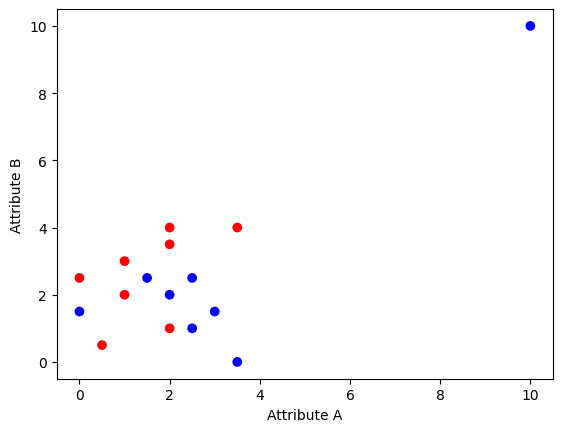

In [2]:
colors = np.array(['b', 'r'])  # 'b' for class 0 and 'r' for class 1

# Create the scatter plot
plt.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]])

# Label the axes
plt.xlabel('Attribute A')
plt.ylabel('Attribute B')

# Show the plot
plt.show()

Outliers are points that lie far from the rest of the data. They are not necessarily invalid points however. Imagine sampling from a Normal Distribution with mean 10 and variance 1. You would expect most points you sample to be in the range [7, 13] but it's entirely possible to see 20 which, on average, should be very far from the rest of the points in the sample (unless we're VERY (un)lucky). These outliers can inhibit our ability to learn general patterns in the data since they are not representative of likely outcomes. They can still be useful in of themselves and can be analyzed in great depth depending on the problem at hand.

b) Are there any points in the dataset that could be outliers? If so, please remove them from the dataset.

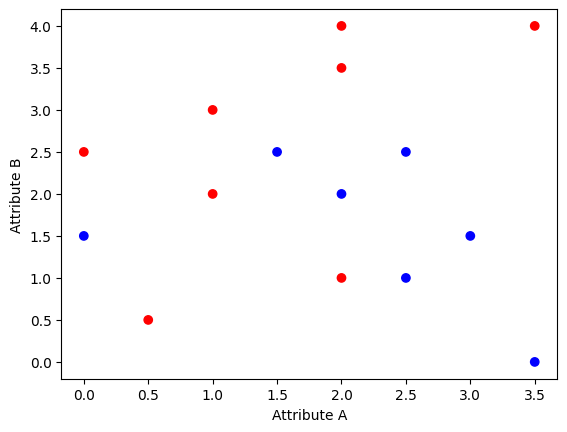

In [3]:
import numpy as np

# Convert data to numpy arrays for easier manipulation
attribute_a = np.array(data["Attribute A"])
attribute_b = np.array(data["Attribute B"])
class_label = np.array(data["Class"])

# Identify the index of the outlier (Attribute A = 10, Attribute B = 10)
outlier_index = np.where((attribute_a == 10) & (attribute_b == 10))

# Remove the outlier from all attributes and classes
attribute_a = np.delete(attribute_a, outlier_index)
attribute_b = np.delete(attribute_b, outlier_index)
class_label = np.delete(class_label, outlier_index)

# Update the dataset without the outlier
data["Attribute A"] = attribute_a.tolist()
data["Attribute B"] = attribute_b.tolist()
data["Class"] = class_label.tolist()

# Plot the cleaned data
colors = np.array(['b', 'r'])
plt.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]])
plt.xlabel('Attribute A')
plt.ylabel('Attribute B')
plt.show()


Noise points are points that could be considered invalid under the general trend in the data. These could be the result of actual errors in the data or randomness that we could attribute to oversimplification (for example if missing some information / feature about each point). Considering noise points in our model can often lead to overfitting.

c) Are there any points in the dataset that could be noise points?

The point at (Attribute A = 0, Attribute B = 1.5) appears isolated compared to the general distribution of points.
The point at (Attribute A = 3.5, Attribute B = 4) is also somewhat distant from the main cluster of points.

For the following point

|  A  |  B  |
|-----|-----|
| 0.5 |  1  |

d) Plot it in a different color along with the rest of the points in the dataset.

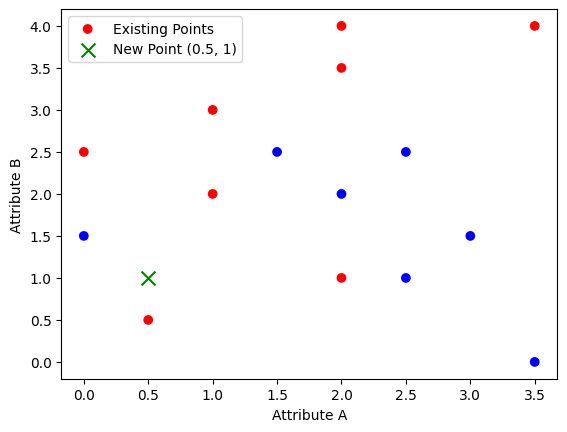

In [4]:
# Plot the cleaned dataset
plt.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]], label='Existing Points')

# Plot the new point in a different color
plt.scatter(0.5, 1, color='g', marker='x', s=100, label='New Point (0.5, 1)')

# Label the axes and add a legend
plt.xlabel('Attribute A')
plt.ylabel('Attribute B')
plt.legend()

# Show the plot
plt.show()


e) Write a function to compute the Euclidean distance from it to all points in the dataset and pick the 3 closest points to it. In a scatter plot, draw a circle centered around the point with radius the distance of the farthest of the three points.

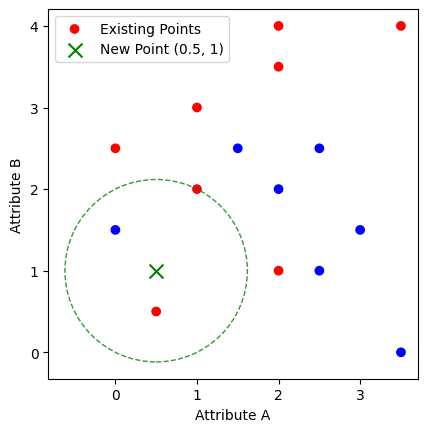

In [5]:
def n_closest_to(example, n):
    distances = []
    for i in range(len(data["Attribute A"])):
        a = data["Attribute A"][i]
        b = data["Attribute B"][i]
        dist = np.sqrt((a - example[0])**2 + (b - example[1])**2)
        distances.append((dist, (a, b)))
    distances.sort()  # Sort based on distance
    return distances[:n]  # Return the n closest points

# Find the 3 closest points to the new point (0.5, 1)
new_point = (0.5, 1)
closest_points = n_closest_to(new_point, 3)

# Extract the radius as the distance to the farthest of the 3 closest points
radius = closest_points[-1][0]

# Plot the cleaned dataset
plt.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]], label='Existing Points')

# Plot the new point in a different color
plt.scatter(new_point[0], new_point[1], color='g', marker='x', s=100, label='New Point (0.5, 1)')

# Draw a circle centered around the new point with radius equal to the farthest of the 3 closest points
location = new_point
cir = plt.Circle(location, radius, fill=False, alpha=0.8, color='g', linestyle='--')
plt.gca().add_patch(cir)

# Label the axes and add a legend
plt.xlabel('Attribute A')
plt.ylabel('Attribute B')
plt.legend()
plt.gca().set_aspect('equal')  # Ensure circle is not an oval

# Show the plot
plt.show()

f) Write a function that takes the three points returned by your function in e) and returns the class that the majority of points have (break ties with a deterministic default class of your choosing). Print the class assigned to this new point by your function.

In [6]:
# Function to determine the majority class of given points
def majority(points):
    class_counts = {0: 0, 1: 0}  # Dictionary to keep count of each class

    # Iterate over the points and count their classes
    for _, point in points:
        idx = data["Attribute A"].index(point[0])  # Get the index of the point in the original data
        point_class = data["Class"][idx]
        class_counts[point_class] += 1

    # Determine the majority class (tie-breaking in favor of class 0)
    if class_counts[1] > class_counts[0]:
        return 1
    else:
        return 0

# Find the class of the new point based on the majority of its 3 nearest neighbors
assigned_class = majority(closest_points)
print(f"The class assigned to the new point is: {assigned_class}")


The class assigned to the new point is: 1


g) Re-using the functions from e) and f), you should be able to assign a class to any new point. In this exercise we will implement Leave-one-out cross validiation in order to evaluate the performance of our model.

For each point in the dataset:

- consider that point as your test set and the rest of the data as your training set
- classify that point using the training set
- keep track of whether you were correct with the use of a counter

Once you've iterated through the entire dataset, divide the counter by the number of points in the dataset to report an overall testing accuracy.

In [7]:
count = 0

for i in range(len(data["Attribute A"])):
    test_point = (data["Attribute A"][i], data["Attribute B"][i])
    actual_class = data["Class"][i]

    training_set = {
        "Attribute A": data["Attribute A"][:i] + data["Attribute A"][i+1:],
        "Attribute B": data["Attribute B"][:i] + data["Attribute B"][i+1:],
        "Class": data["Class"][:i] + data["Class"][i+1:]
    }

    data_backup = data.copy()
    data = training_set

    closest_points = n_closest_to(test_point, 3)
    prediction = majority(closest_points)

    data = data_backup

    if prediction == actual_class:
        count += 1

accuracy = count / len(data["Attribute A"])
print(f"Overall accuracy = {accuracy:.2f}")


Overall accuracy = 0.53
